
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



-------------------------------------------------------------------------------------------------------

# Pricing and Driver Earnings for a Two-Sided Mobility Platform: A Case of Amsterdam, the Netherlands

or 

# The Effects of Profit-Based Pricing on Driver Earnings and Performance of Two-Sided Mobility Platforms

# Abstract  

In this paper, we investigate how the  pricing of ride-pooling affects driver earnings. We also examine how profit-based setting affects these performance indicators. To this end, we applied a matching algorithm  to the case of ride-pooling and give a choice set to the driver for the case of Amsterdam, the Netherlands. For our simulation, we utilize an agent-based simulator reproducing the transport systems for two-sided mobility platforms (like Uber and Lyft) and applied three state-of-the-art pricing strategies such as <strong>profit maximization</strong>,  <strong>solo ride-hailing</strong>, and <strong>nearest pickup ride-pooling</strong>. We find that the profit maximization pricing strategy outperforms the other and traveler utility can be further improved by $\%X$ while reducing the total cost to serve the pooled rides. While offering a discount for profit maximization travel time is significantly higher $\%X$  than for private rides. 

-------------------------------------------------------------------------------------------------------

## Mode of Simulation 

Three type of simulation 

<strong>1. Profit maximization</strong> 

<strong>2. Solo ride-hailing</strong>

<strong>3. Nearest pickup ride-pooling</strong>

## Load ExMAS and MaaSSim


In [8]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Delft, Netherlands

In [9]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 1 # 6 minutes hour of simulation
params.nP = 500 # reuqests (and passengers)
params.nV = 5 # vehicles



## Parameters for ExMAS

In [10]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.25
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_veh' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True



# Strategy 1: 
# params.kpi = 1 (Profit Maximazation)


### Profit Mazimization - Begin 

In [11]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

01-03-23 10:42:11-INFO-Initializing pairwise trip shareability between 500 and 500 trips.
01-03-23 10:42:11-INFO-creating combinations
01-03-23 10:42:11-INFO-249500	 nR*(nR-1)
01-03-23 10:42:14-INFO-Reduction of feasible pairs by 99.42%
01-03-23 10:42:14-INFO-Degree 2 	Completed
01-03-23 10:42:14-INFO-trips to extend at degree 2 : 3772
01-03-23 10:42:17-INFO-At degree 2 feasible extensions found out of 1494 searched
01-03-23 10:42:17-INFO-Degree 3 	Completed
01-03-23 10:42:17-INFO-trips to extend at degree 3 : 1494
01-03-23 10:42:18-INFO-At degree 3 feasible extensions found out of 387 searched
01-03-23 10:42:18-INFO-Degree 4 	Completed
01-03-23 10:42:18-INFO-Max degree reached 4
01-03-23 10:42:18-INFO-Trips still possible to extend at degree 4 : 387


In [12]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

01-03-23 10:42:19-INFO-Matching 500 trips to 6153 rides in order to min u_veh
01-03-23 10:42:21-INFO-Problem solution: Optimal. 
Total costs for single trips:        129,020 
reduced by matching to:               89,192


In [13]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,...,row,selected,nodes,req_id,sim_schedule,ttrav,dist,fare,commission,driver_revenue
0,[0],6.522500,352,1,[6.5225],"[0, 352]",[0],[0],1,0,...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 618269390, 44804961]","[None, 0, 0]",node time req_id od 0 N...,352,3.52,5.290500,1.058100,4.2324
1,[1],6.385500,345,1,[6.3855],"[6, 345]",[1],[1],1,1,...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44883632, 4655063484]","[None, 1, 1]",node time req_id od 0 ...,345,3.45,5.178000,1.035600,4.1424
2,[2],8.389500,453,1,[8.3895],"[7, 453]",[2],[2],1,2,...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 2572707866, 1620840079]","[None, 2, 2]",node time req_id od 0 ...,453,4.53,6.804000,1.360800,5.4432
3,[3],2.186000,118,1,[2.186],"[12, 118]",[3],[3],1,3,...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44835261, 4617340492]","[None, 3, 3]",node time req_id od 0 ...,118,1.18,1.773000,0.354600,1.4184
4,[4],3.959000,214,1,[3.959],"[15, 214]",[4],[4],1,4,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44875431, 44814377]","[None, 4, 4]",node time req_id od 0 NaN...,214,2.14,3.210000,0.642000,2.5680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,"[253, 241, 262, 267]",24.414900,806,42,"[6.768825, 4.3701, 7.762325000000001, 5.51365]","[1760.0, 104, 54, 70, 157, 101, 136, 184]","[253, 241, 262, 267]","[241, 253, 267, 262]",4,6148,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1668136705, 1774593290, 1402771566, 140...","[None, 253, 241, 262, 267, 241, 253, 267, 262]",node time req_id od 0 ...,806,8.06,15.597000,3.119400,12.4776
6149,"[253, 241, 262, 254]",25.217000,787,40,"[6.982675, 4.31095, 6.988825, 6.93455]","[1760.0, 104, 54, 115, 129, 101, 103, 181]","[253, 241, 262, 254]","[241, 253, 262, 254]",4,6149,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1668136705, 1774593290, 1402771566, 447...","[None, 253, 241, 262, 254, 241, 253, 262, 254]",node time req_id od 0 ...,787,7.87,16.299000,3.259800,13.0392
6150,"[464, 466, 493, 495]",27.769775,1041,40,"[9.189625, 5.038, 6.341975, 7.200175]","[3217.5, 277, 87, 170, 87, 90, 108, 222]","[464, 466, 493, 495]","[466, 464, 493, 495]",4,6150,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 260125198, 44858422, 1371031524, 448309...","[None, 464, 466, 493, 495, 466, 464, 493, 495]",node time req_id od 0 ...,1041,10.41,17.404875,3.480975,13.9239
6151,"[251, 272, 318, 319]",28.019350,1033,40,"[8.992125, 4.549175, 7.015625, 7.462425]","[1772.0, 270, 25, 157, 127, 106, 103, 245]","[251, 272, 318, 319]","[272, 251, 318, 319]",4,6151,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44782465, 3669167311, 620833182, 448387...","[None, 251, 272, 318, 319, 272, 251, 318, 319]",node time req_id od 0 ...,1033,10.33,17.568000,3.513600,14.0544


In [25]:
params.kpi = 1

In [8]:
sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate

27-02-23 15:59:03-INFO-Matching 100 trips to 254 rides in order to min u_veh
27-02-23 15:59:03-INFO-Problem solution: Optimal. 
Total costs for single trips:         25,972 
reduced by matching to:               22,462
0.5
0.5
27-02-23 15:59:04-CRITICAL-this is request 1 with [1, 141, 142, 242] available rides.
27-02-23 15:59:04-CRITICAL-ride 1 available [1]
27-02-23 15:59:04-CRITICAL-ride 141 available [1, 0]
27-02-23 15:59:04-CRITICAL-ride 142 available [1, 0]
27-02-23 15:59:04-CRITICAL-ride 242 available [0, 1]
27-02-23 15:59:04-CRITICAL-this is reuqest 1 with [1, 141, 142, 242] still available rides.
Profit Maximization
27-02-23 15:59:04-CRITICAL-vehicle 3 has 4 choices
0.5
27-02-23 15:59:04-CRITICAL-this is request 2 with [2, 166] available rides.
27-02-23 15:59:04-CRITICAL-ride 2 available [1]
27-02-23 15:59:04-CRITICAL-ride 166 available [1, 0]
27-02-23 15:59:04-CRITICAL-this is reuqest 2 with [2, 166] still available rides.
Profit Maximization
27-02-23 15:59:04-CRITICAL-vehicle

In [28]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE,Vehicles
veh,,,,,,,,,,,,,,,,,,,,,
1,11,0.0,False,0,0,60.0,15.0,0,141.0,0,...,0,7878.0,1408.0,0.0,967.0,486.0,5017.0,26.005,2.6832,1
2,9,0.0,False,0,0,124.0,15.0,0,128.0,0,...,0,7525.0,1684.0,0.0,1053.0,413.0,4375.0,19.305,0.2052,2
3,2,0.0,False,0,0,18.0,15.0,0,47.0,0,...,0,0.0,428.0,3600.0,459.0,115.0,-4602.0,11.609,5.0316,3
4,6,0.0,False,0,0,57.0,15.0,0,260.0,0,...,0,8255.0,1219.0,0.0,825.0,443.0,5768.0,20.472,6.1428,4
5,3,0.0,False,0,0,93.0,24.0,0,60.0,0,...,0,9447.0,542.0,0.0,543.0,174.0,8188.0,5.430,1.7232,5


In [29]:
sim.res[0].veh_exp['REVENUE'].to_list()

[2.6832000000000003,
 0.2052,
 5.031599999999999,
 6.142799999999999,
 1.7231999999999998]

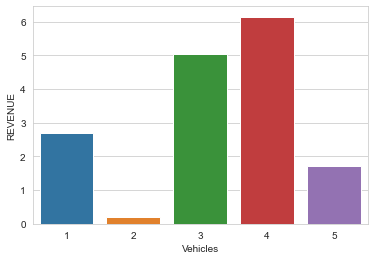

In [30]:
import seaborn as sns
sns.set_style("whitegrid")
sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total Revenue of all the driver 

In [31]:
sim.res[0].all_kpi # All driver revenue 

15.786

# Strategy 2: 

# params.kpi = 2 (Pooled Ride - Nearest) 


In [ ]:
params.kpi = 2

In [ ]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

In [ ]:
sim.res[0].veh_exp

In [ ]:
sim.res[0].veh_exp['REVENUE'].to_list()

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver

In [ ]:
sim.res[0].all_kpi # All driver revenue 

# Strategy 3: 
# params.kpi = 3 (Private ride)


In [ ]:
params.kpi = 3

In [ ]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

In [ ]:
sim.res[0].veh_exp

In [ ]:
sim.res[0].veh_exp['REVENUE'].to_list()

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")

#ax.set(xlabel=None)
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver 

In [16]:
sim.res[0].all_kpi # All driver revenue 

58.006800000000005

# All in one Simulation  

In [7]:
responses = []
avg_kpi = []
idle_time = []

for i in range(1, 4):
    params.kpi = i
    sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate
    sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/veh{}.csv'.format(i))
    sim.res[0].pax_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/pax{}.csv'.format(i))
    #driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)['Vehicles'] = sim.res[0].veh_exp.index
    #sim.res[0].veh_exp['ds'] = f"{i}"
    
    #responses.append(sim.res[0].veh_exp)
     
   # vehicles = sim.res[0].veh_exp.loc[sim.res[0].veh_exp["nRIDES"] > 0]
    #no_of_veh = len(vehicles)
    
    #avg_kpi.append(sim.res[0].all_kpi/no_of_veh)
    #idle_time.append(vehicles['IDLE'].sum()/no_of_veh)
    
    #_inData.sblts.rides['commission'] = _inData.sblts.rides.apply(lambda row: row.fare*sp.comm_rate, axis=1)
    

28-02-23 22:11:14-INFO-Matching 300 trips to 2335 rides in order to min u_veh
28-02-23 22:11:16-INFO-Problem solution: Optimal. 
Total costs for single trips:         80,177 
reduced by matching to:               59,995
0.5
28-02-23 22:12:03-CRITICAL-this is request 0 with [0, 1058] available rides.
28-02-23 22:12:03-CRITICAL-ride 0 available [1]
28-02-23 22:12:03-CRITICAL-ride 1058 available [1, 0]
28-02-23 22:12:03-CRITICAL-this is reuqest 0 with [0, 1058] still available rides.
Profit Maximization
28-02-23 22:12:03-CRITICAL-vehicle 1 has 2 choices
0.5
28-02-23 22:12:03-CRITICAL-this is request 1 with [1, 1058, 1139, 1565, 1723] available rides.
28-02-23 22:12:03-CRITICAL-ride 1 available [1]
28-02-23 22:12:03-CRITICAL-ride 1058 not available [2, 1]
28-02-23 22:12:03-CRITICAL-ride 1139 available [1, 0]
28-02-23 22:12:03-CRITICAL-ride 1565 available [0, 1]
28-02-23 22:12:03-CRITICAL-ride 1723 available [1, 0]
28-02-23 22:12:03-CRITICAL-this is reuqest 1 with [1, 1139, 1565, 1723] stil

# Performance Parameters for Driver

In [10]:
import pandas as pd
index = pd.Index(['Revenue', 'Profit', 'Cost', 'Idle Time'])
driver_data = pd.DataFrame({"Profit Maximization":[], "Pooled Ride": [], "Private Ride": []})
driver_data.loc['Revenue'] = avg_kpi
driver_data.loc['Idle Time'] = idle_time
driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)

ValueError: cannot set a row with mismatched columns

In [9]:
driver_data

,Profit Maximization,Pooled Ride,Private Ride
Revenue,4.192905,4.192905,4.192905
Idle Time,3566.400000,3542.550000,3514.450000
Cost,2.096452,2.096452,2.096453


In [ ]:
csv_data = driver_data.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/nV20.csv')

In [ ]:
print('\nCSV String:\n', csv_data)